<a href="https://colab.research.google.com/github/rightnow-jw/text_data_analysis/blob/main/naver_movie_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기


*   데이터 출처:https://github.com/e9t/nsmc/



In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/e9t/nsmc/refs/heads/master/ratings_train.txt',sep = '\t')
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


# EDA


In [22]:

# shape
df .shape


(149995, 4)

In [4]:
#null
df.isnull().sum()

,0
id,0
document,5
label,0


In [5]:
df[df.isnull()]

,id,document,label
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
149995,NaN,NaN,NaN
149996,NaN,NaN,NaN
149997,NaN,NaN,NaN
149998,NaN,NaN,NaN


In [6]:
df[df['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [7]:
df.dropna(inplace = True)

In [8]:
df. shape

(149995, 3)

<Axes: xlabel='len', ylabel='Count'>

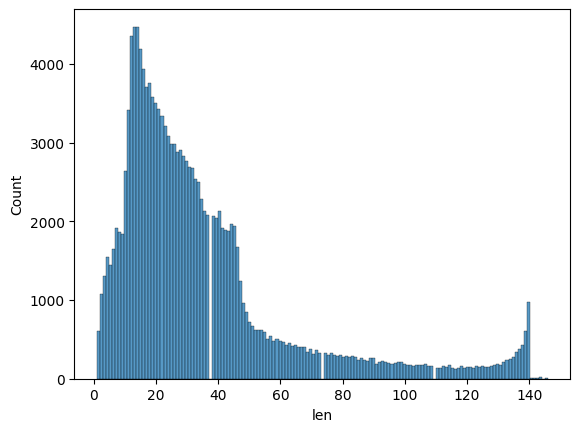

In [12]:
#텍스트길이
import seaborn as sns
# 텍스트 길이
df['len'] = df['document'].str.len()
sns.histplot(df['len'])

In [27]:
# 워드 클라우드
import matplotlib.pyplot as plt
from wordcloud import WordCloud

!apt-get install -y fonts-nanum
import matplotlib.font_manager as fm

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

text = """
"""


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [14]:
# negative
negative_text = df[df['label'] == 0]['document']
# positive
positive_text = df[df['label'] == 1]['document']

In [15]:
# Dataframe 구조의 문자를 문자열 형태로 변환
negative_text = ' '.join(negative_text.astype(str))
positive_text = ' '.join(positive_text.astype(str))

In [16]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 19.2 MB/s eta 0:00:00


In [17]:
# 각 문자열에서 명사만 추출
from konlpy.tag import Okt
okt = Okt()
negative_nouns = okt.nouns(negative_text)
positive_nouns = okt.nouns(positive_text)

In [18]:
# 추출한 명사에서 각 명사가 몇 번 등장했는지 확인
from collections import Counter # 특정 단어가 몇번 등장했는지 딕셔너리 타입으로 반환(예: {"key", 50})
negative_counts = Counter(negative_nouns)
positive_counts = Counter(positive_nouns)

In [19]:
# 자주 등장한(예. 50번 이상 등장한) 단어에 대해서만 워드 클라우드 생성
top_50_negative = negative_counts.most_common(50) # 특정 빈도수 이상 나타난 단어들을 반환
top_50_positive = positive_counts.most_common(50)

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


In [28]:
wordcloud = WordCloud(font_path=font_path,
                      width=800,
                      height=400,
                      background_color='white').generate_from_frequencies(top_50_negative) # 빈도수에 따라 워드 클라우드 생성

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

AttributeError: 'list' object has no attribute 'items'

In [24]:
dir(WordCloud)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 '_draw_contour',
 '_get_bolean_mask',
 'fit_words',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'process_text',
 'recolor',
 'to_array',
 'to_file',
 'to_image',
 'to_svg']